## ***Importing Required Libraries***

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## ***Morphological Transformation***

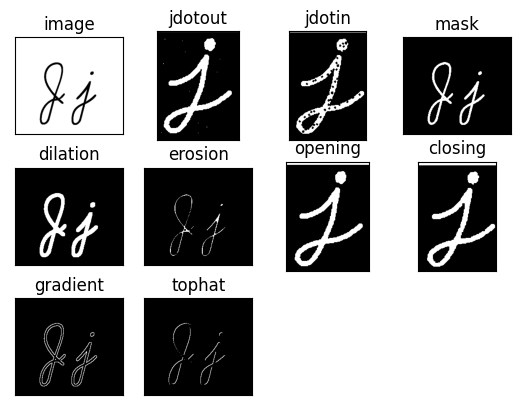

In [2]:
img = cv2.imread('smarties.png',cv2.IMREAD_GRAYSCALE)
img = cv2.imread('j.png',cv2.IMREAD_GRAYSCALE)
_,mask = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)

kernal = np.ones((2,2),np.uint8) #normally a square or shape which we want to apply on image. Kernal of numpy ones which means white square of balls

dilation = cv2.dilate(mask,kernal,iterations=3)
erosion = cv2.erode(mask,kernal,iterations=3)

jdo = cv2.imread('jdotout.png',cv2.IMREAD_GRAYSCALE)
jdi = cv2.imread('jdotin.png',cv2.IMREAD_GRAYSCALE)
_,jdotout = cv2.threshold(jdo,220,255,cv2.THRESH_BINARY)
_,jdotin = cv2.threshold(jdi,220,255,cv2.THRESH_BINARY)

opening = cv2.morphologyEx(jdotout,cv2.MORPH_OPEN,kernal,iterations=4) #erosion followed by dilation
closing = cv2.morphologyEx(jdotin,cv2.MORPH_CLOSE,kernal,iterations=4) #dilation followed by erosion
gradient = cv2.morphologyEx(mask,cv2.MORPH_GRADIENT,kernal) #difference bw dilation and erosion
tophat = cv2.morphologyEx(mask,cv2.MORPH_TOPHAT,kernal) #difference bw image and opening of image

titles = ['image','jdotout','jdotin','mask','dilation','erosion','opening','closing','gradient','tophat']
images = [img,jdotout,jdotin,mask,dilation,erosion,opening,closing,gradient,tophat]
for i in range(len(images)):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.savefig('morpho tansform')
plt.show()

## ***Gradient and Edge Detection***

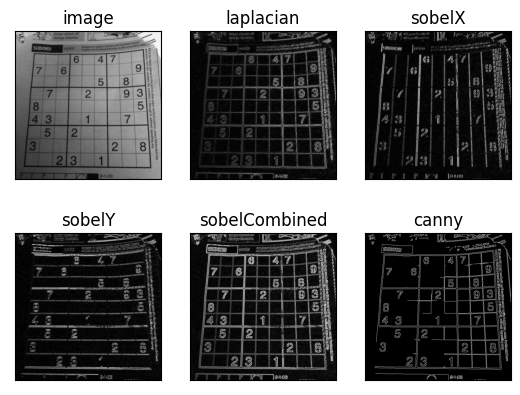

In [3]:
img = cv2.imread('sudoku.png',cv2.IMREAD_GRAYSCALE)
# img = cv2.medianBlur(img,5)
# img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

lap = cv2.Laplacian(img,cv2.CV_64F,ksize=3)
lap = np.uint8(np.absolute(lap))

sobelX = cv2.Sobel(img,cv2.CV_64F,1,0)
sobelY = cv2.Sobel(img,cv2.CV_64F,0,1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX,sobelY)

canny = cv2.Canny(img,100,200) #lesser noises

titles = ['image','laplacian','sobelX','sobelY','sobelCombined','canny']
images = [img,lap,sobelX,sobelY,sobelCombined,canny]

for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## ***Canny Edge Detection***

In [7]:
def nothing(x):
    pass

cv2.namedWindow("Tracking")
cv2.createTrackbar("TH1","Tracking",0,255,nothing)
cv2.createTrackbar("TH2","Tracking",0,255,nothing)

while True:

    img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)

    th1 = cv2.getTrackbarPos("TH1","Tracking")
    th2 = cv2.getTrackbarPos("TH2","Tracking")

    canny = cv2.Canny(img,th1,th2)
    #lesser noise in canny edge detection

    cv2.imshow("image",img)
    cv2.imshow("canny",canny)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

## ***Split & Merge***

In [10]:
img = cv2.imread('messi5.jpg',-1)

print(img.shape) #returns a tuple of number of rows, columns,and channels
print(img.size) #returns total number of pixel accessed
print(img.dtype) #returns image datatype

b,g,r=cv2.split(img) #split into bgr channel
img = cv2.merge((b,g,r)) #merge bgr channel

ball = img[280:340,330:390] 
img[273:333,100:160] = ball

cv2.imshow('image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(342, 548, 3)
562248
uint8


## ***Adding two Images***

In [3]:
img = cv2.imread('messi5.jpg')
img2=cv2.imread('opencv-logo.png')

ball = img[280:340,330:390] 
img[273:333,100:160] = ball

img = cv2.resize(img,(512,512))
img2 = cv2.resize(img2,(512,512))

# output_image=cv2.add(img,img2)
output_image=cv2.addWeighted(img,0.9,img2,0.1,0) #0.9 and 0.1 are weight of each image

cv2.imshow('image',output_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

## ***Template Matching***

In [2]:
img = cv2.imread('messi5.jpg')
grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
template = cv2.imread('messi_face.png',0)
w,h = template.shape[::-1]

res = cv2.matchTemplate(grey_img,template,cv2.TM_CCOEFF_NORMED)
print(res)
threshold = 0.8
loc = np.where(res>=threshold)
print(loc)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img,pt,(pt[0]+w,pt[1]+h),(0,0,255),2)

cv2.imshow('img',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 0.02493327  0.01881832  0.01376684 ...  0.10501159  0.09257649
   0.07917856]
 [ 0.01049772  0.00540033  0.00158504 ...  0.09378709  0.08106917
   0.0675549 ]
 [-0.00378703 -0.00763618 -0.01071623 ...  0.0826247   0.07002017
   0.05648014]
 ...
 [ 0.28336388  0.28692254  0.28500953 ... -0.04397315 -0.04136519
  -0.03124696]
 [ 0.27320713  0.2729679   0.27157992 ... -0.05682089 -0.04935247
  -0.04164146]
 [ 0.25018913  0.25166565  0.24860212 ... -0.06655486 -0.05723738
  -0.05190805]]
(array([62, 62, 63, 63, 63, 63, 64, 64, 64, 64], dtype=int64), array([205, 206, 204, 205, 206, 207, 204, 205, 206, 207], dtype=int64))


## ***Colour Detection using HSV color space***

In [6]:
# 61 238 178 / 121 255 255 for green
# 82 51 51 / 133 255 255 for blue
# 61 58 51 / 136 255 255 for both GB
def nothing(x):
    pass

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH","Tracking",0,255,nothing)
cv2.createTrackbar("LS","Tracking",0,255,nothing)
cv2.createTrackbar("LV","Tracking",0,255,nothing)
cv2.createTrackbar("UH","Tracking",255,255,nothing)
cv2.createTrackbar("US","Tracking",255,255,nothing)
cv2.createTrackbar("UV","Tracking",255,255,nothing)

while True:
    frame = cv2.imread('smarties.png')

    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("LH","Tracking")
    l_s = cv2.getTrackbarPos("LS","Tracking")
    l_v = cv2.getTrackbarPos("LV","Tracking")

    u_h = cv2.getTrackbarPos("UH","Tracking")
    u_s = cv2.getTrackbarPos("US","Tracking")
    u_v = cv2.getTrackbarPos("UV","Tracking")

    l_b = np.array([l_h,l_s,l_v])
    u_b = np.array([u_h,u_s,u_v])

    mask = cv2.inRange(hsv,l_b,u_b)
    res = cv2.bitwise_and(frame,frame,mask=mask)

    cv2.imshow("frame",frame)
    cv2.imshow("mask",mask)
    cv2.imshow("res",res)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.waitKey(0)
cv2.destroyAllWindows()